<H1>PART 1</H1>

In [3]:
#graphing v(t) and I(t) of a single neuron using IZH model

import numpy as np
import matplotlib.pyplot as plt
import csv
import math

a = 0.02
b = 0.2
c = -65
d = 2
dt = 0.001

In [4]:
times = np.arange(0,5000,0.001)    #array of time stamps (in ms)
v = np.zeros_like(times)    #array of membrane potentials (in mV) at different times
u = np.zeros_like(times)    #array of recovery variables at different times
v[0] = -65
u[0] = b*v[0]

with open('Iext.csv','r') as f:
    rdr = csv.reader(f)
    I = np.array([float(row[0]) for row in rdr])

In [5]:
def membranePotential(a,b,c,d):
    global v,u
    for i in range(len(v)-1):
        v[i+1] = v[i] + dt*(0.04*(v[i]**2) + 5*v[i] + 140 - u[i] + I[i])
        u[i+1] = u[i] + dt*(a*(b*v[i] - u[i]))
    
        if v[i+1] >= 30:
            v[i+1] = c
            u[i+1] = u[i+1] + d

In [6]:
fast = (0.1,0.3,-55,2)
bursting = (0.02,0.2,-50,4)
regular = (0.02,0.2,-65,2)

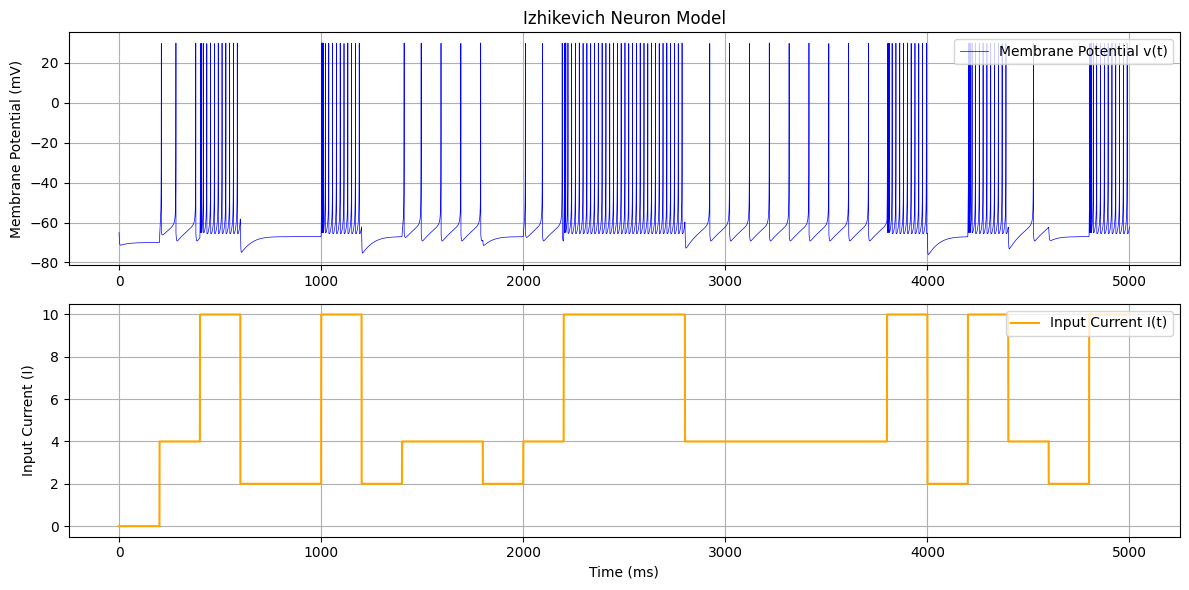

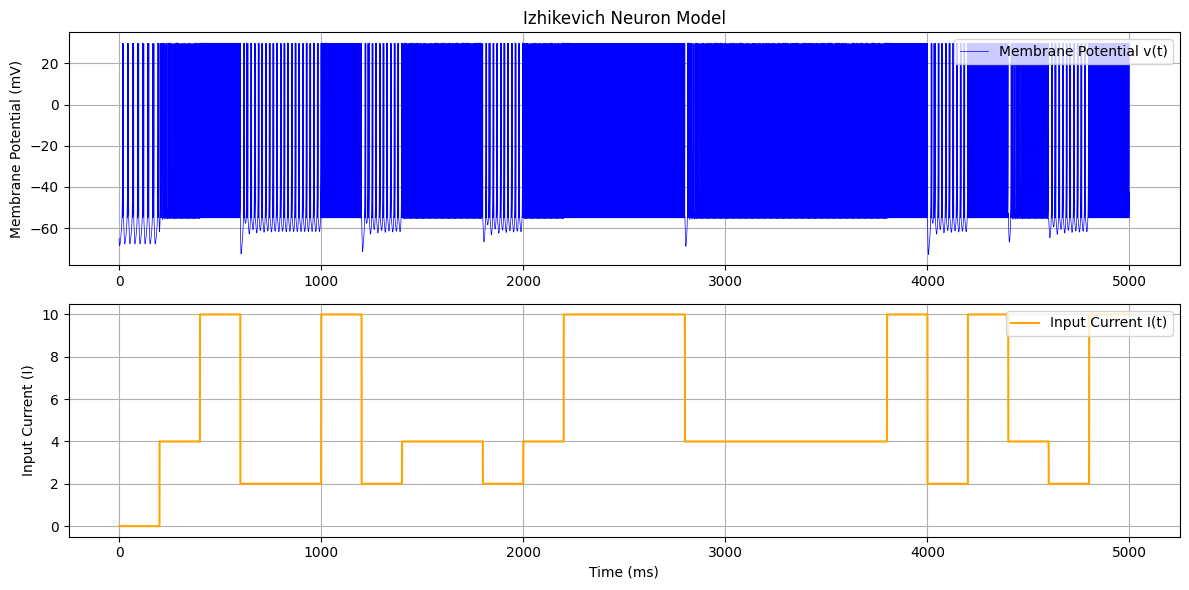

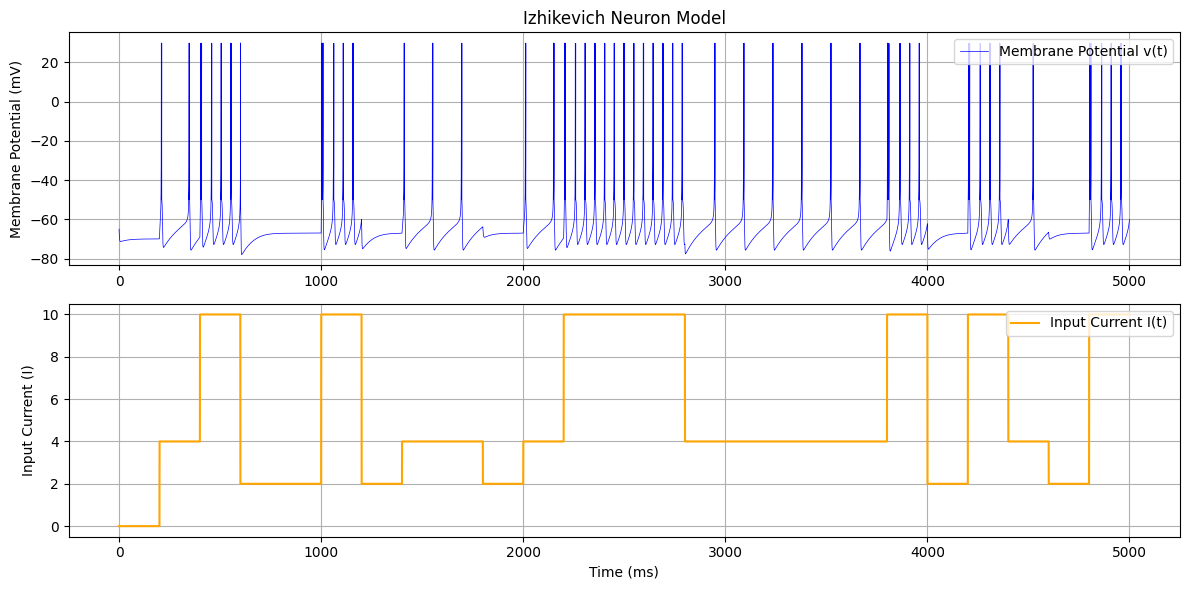

In [7]:
for setting in [regular,fast,bursting]:
    a,b,c,d = setting
    membranePotential(a,b,c,d)
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(times, v, label='Membrane Potential v(t)', color='blue',linewidth=0.5)
    plt.title('Izhikevich Neuron Model')
    plt.ylabel('Membrane Potential (mV)')
    plt.grid()
    plt.legend(loc = 1)
    plt.subplot(2, 1, 2)
    plt.plot(times, I, label='Input Current I(t)', color='orange')
    plt.xlabel('Time (ms)')
    plt.ylabel('Input Current (I)')
    plt.grid()
    plt.legend(loc = 1)
    plt.tight_layout()
    plt.show()

<H1>PART 2</H1>

In [61]:
tauR = 0.5
tauD = 8
V0 = -20
Vsyn = 20
W = 1

In [62]:
r = np.zeros_like(times)
Ii = np.zeros_like(times)
r[0] = 0                            ## CHECK FOR ACTUAL VALUE LATER PLEASE
Ii[0] = 0

In [63]:
for t in range(len(r)-1):
    r[t+1] = r[t]+ dt*((1/tauR - 1/tauD)*((1-r[t])/(1 + math.e**(V0-v[t]))) - r[t]/tauD)
    Ii[t+1] = W*r[t+1]*(v[t+1]-Vsyn)
    if Ii[t+1] < 0:
        Ii[t+1] = 0

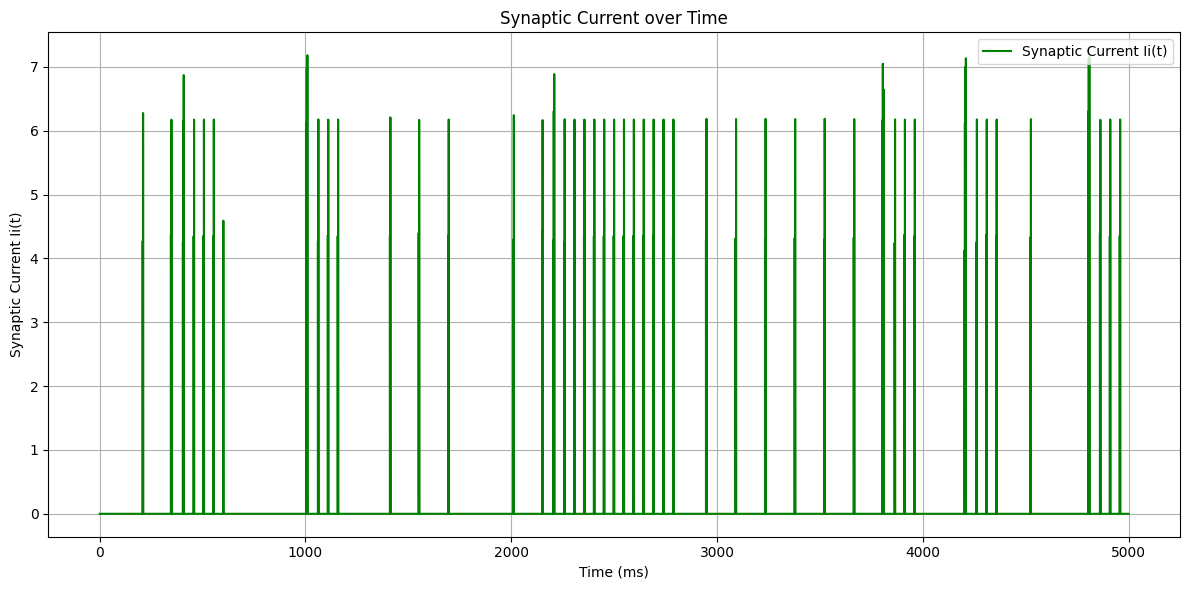

In [64]:
#plot Ii(t)
plt.figure(figsize=(12, 6))
plt.plot(times, Ii, label='Synaptic Current Ii(t)', color='green')  
plt.title('Synaptic Current over Time')
plt.xlabel('Time (ms)')
plt.ylabel('Synaptic Current Ii(t)')
plt.grid()
plt.legend(loc = 1)
plt.tight_layout()
plt.show()


In [65]:
vi = np.zeros_like(times)
ui = np.zeros_like(times)
vi[0] = -65
ui[0] = vi[0]*b

In [66]:
def neuronImembranePotential(a,b,c,d):
    global vi,ui
    for i in range(len(vi)-1):
        vi[i+1] = vi[i] + dt*(0.04*(vi[i]**2) + 5*vi[i] + 140 - ui[i] + Ii[i])
        ui[i+1] = ui[i] + dt*(a*(b*vi[i] - ui[i]))
    
        if vi[i+1] >= 30:
            vi[i+1] = c
            ui[i+1] = ui[i+1] + d

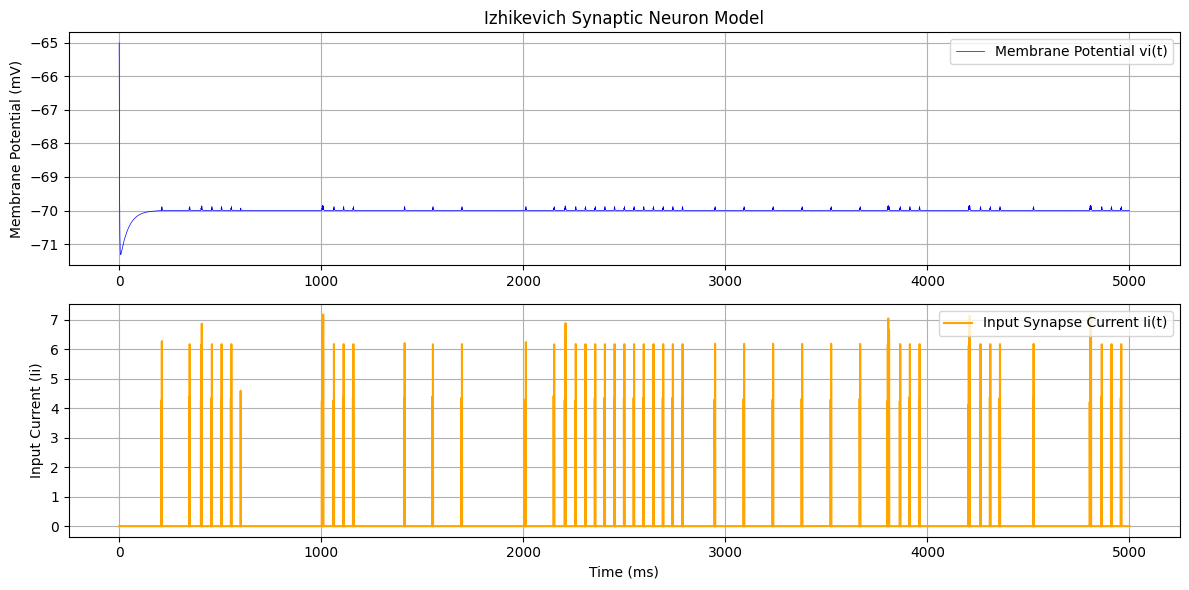

In [67]:
neuronImembranePotential(a,b,c,d)
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(times, vi, label='Membrane Potential vi(t)', color='blue',linewidth=0.5)
plt.title('Izhikevich Synaptic Neuron Model')
plt.ylabel('Membrane Potential (mV)')
plt.grid()
plt.legend(loc = 1)
plt.subplot(2, 1, 2)
plt.plot(times, Ii, label='Input Synapse Current Ii(t)', color='orange')
plt.xlabel('Time (ms)')
plt.ylabel('Input Current (Ii)')
plt.grid()
plt.legend(loc = 1)
plt.tight_layout()
plt.show()

### Comparison of change in synaptic weight (W)


#### W = 10
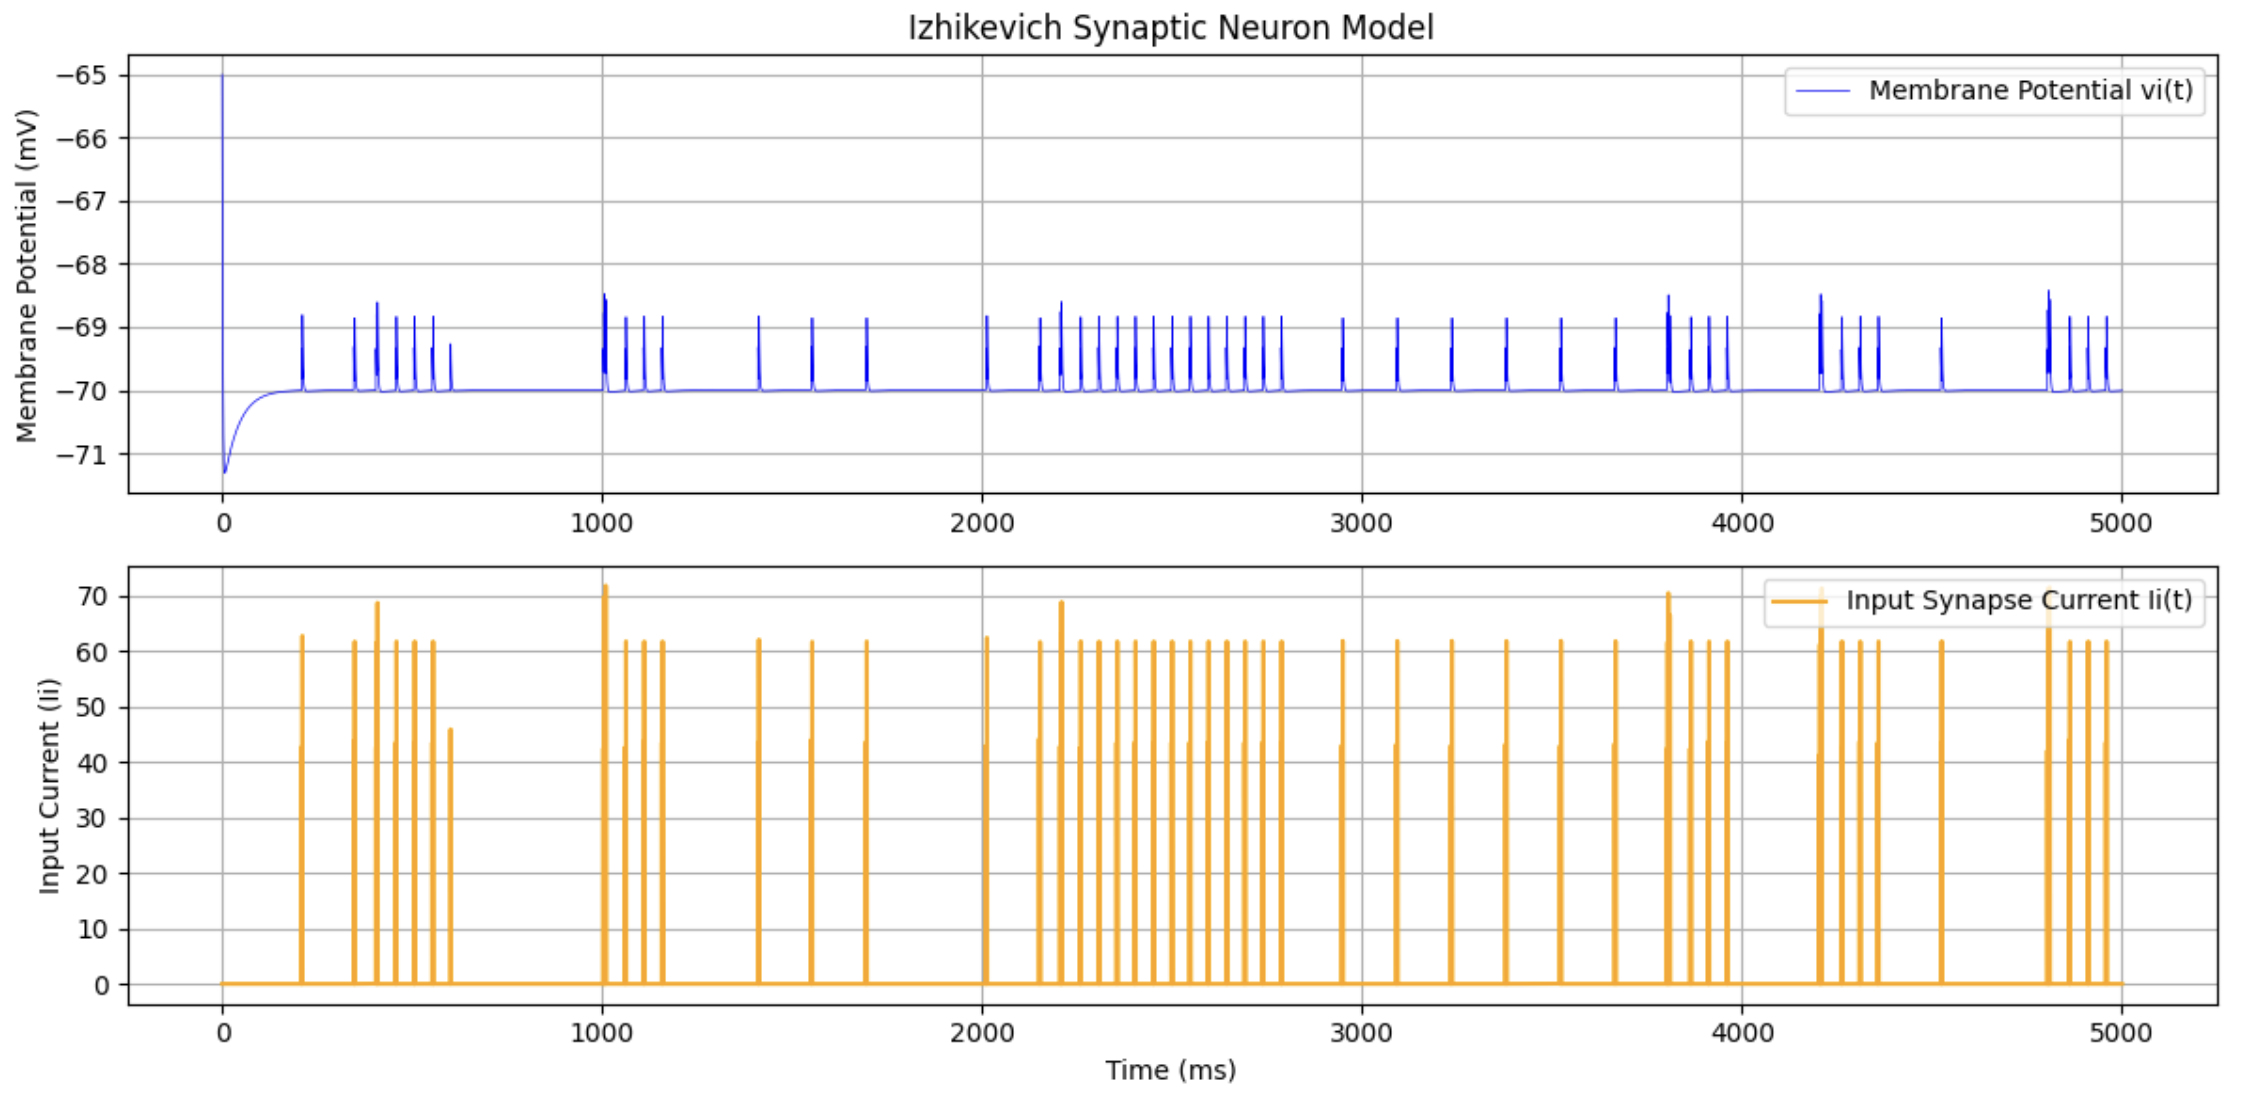

#### W = 1
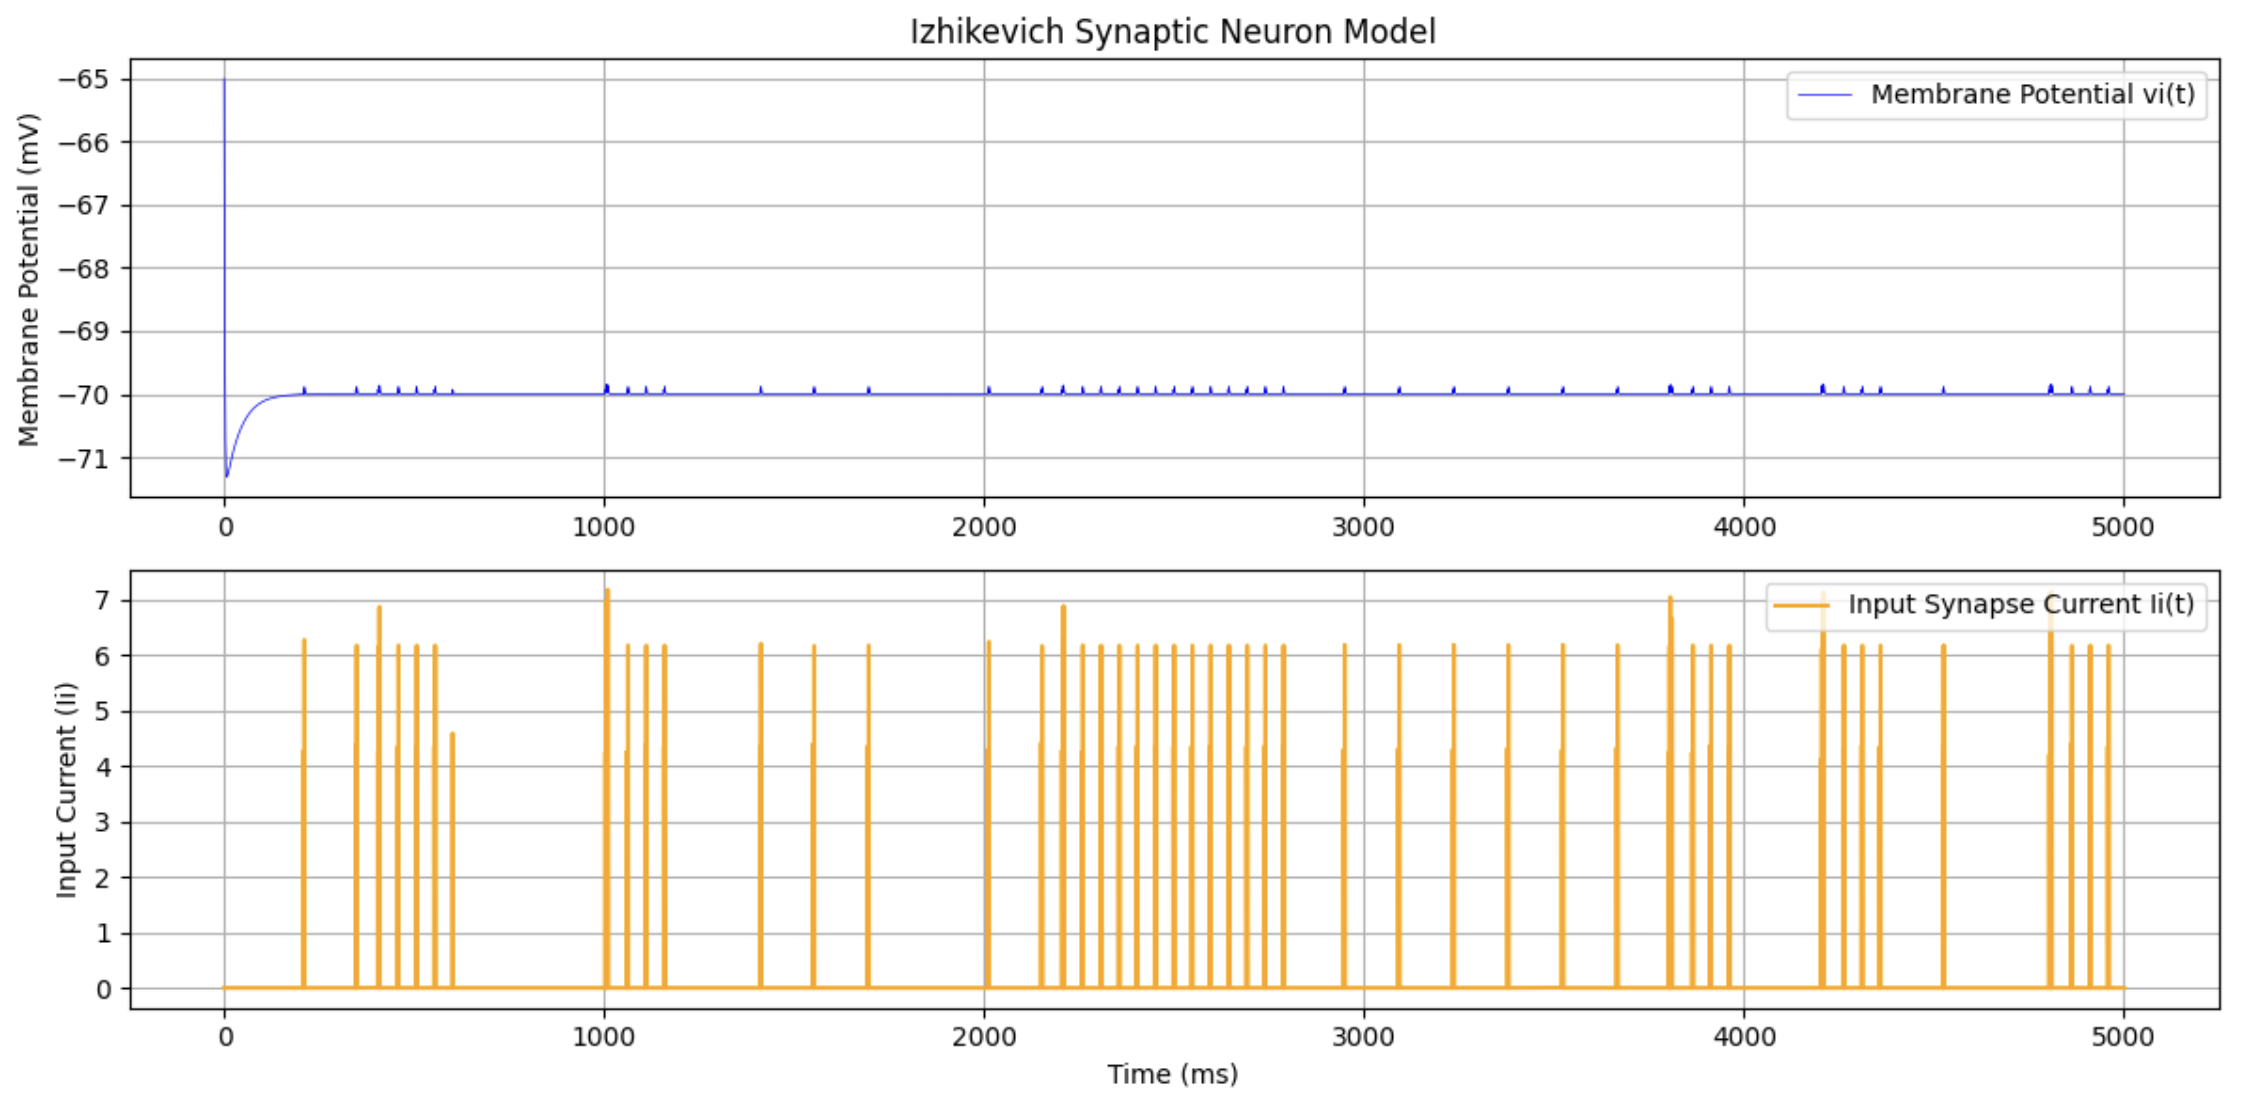


References:

1. Gupta, P. (2025, September 7). Neurotech Recruitments 25-26 Tech Track Task-1. BITS Pilani Neurotech Lab. https://bits-pilani-neurotech-lab.github.io/posts/tech-track-task-1/
2. Differential equations - Euler’s Method. (n.d.). https://tutorial.math.lamar.edu/classes/de/eulersmethod.aspx
3. A Novel CPU/GPU Simulation Environment for Large-Scale Biologically-Realistic Neural Modeling - Scientific Figure on ResearchGate. Available from: https://www.researchgate.net/figure/IZH-neuron-model-specific-values-used-for-parameters-a-b-c-and-d_fig3_257535603 [accessed 9 Sept 2025]